<a href="https://colab.research.google.com/github/rodmart21/CV/blob/main/Basics_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Library


The images in Python can be threated as arrays where we define the diferent characteristics of each one. Taking this into account, it is possible to make a lot of manipulations in these images. We are mainly going to see this library with many resources.

<ul>
    <li><a href='#PIL'>Open CV </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
        </ul>
    </li>
    
</ul>


----


Download the images for the lab:


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png

--2024-05-23 15:40:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  1.62MB/s    in 0.3s    

2024-05-23 15:40:18 (1.62 MB/s) - ‘lenna.png’ saved [473831/473831]

--2024-05-23 15:40:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-cours

This function concatenates two images horizontally into a new image.

In [2]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [3]:
my_image = "lenna.png"

The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory.


In [47]:
import os
cwd = os.getcwd()
cwd

'/content'

The "path" to an image can be found using the following line of code.


In [48]:
image_path = os.path.join(cwd, my_image)
image_path

'/content/lenna.png'

## Load in Image in Python


OpenCV is a library used for computer vision. It has more functionality than the `PIL` library but is more difficult to use. We can import `OpenCV` as follows:


In [49]:
import cv2

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [50]:
image = cv2.imread(my_image)

The result is a numpy array with intensity values as 8-bit unsigned integers.


In [6]:
type(image)

numpy.ndarray

We can get the shape of the array from the `shape` attribute.


In [7]:
image.shape

(512, 512, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:


In [51]:
image.max()

255

and


In [52]:
image.min()

3

##  Plotting an Image


You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter:


In [10]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

You can also use the `imshow` function from the `matplotlib` library:


In [11]:
import matplotlib.pyplot as plt

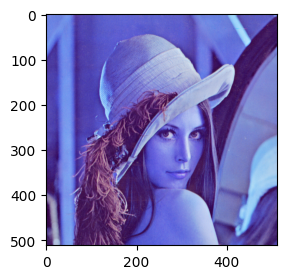

In [17]:
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [13]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

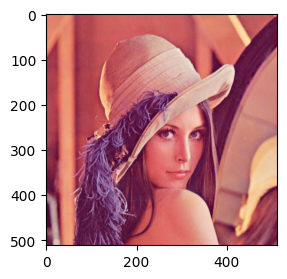

In [53]:
plt.figure(figsize=(3,3))
plt.imshow(new_image)
plt.show()

You can also load the image using its path, this comes in handy if the image is not in your working directory:


In [54]:
image_path= '/content/lenna.png'

In [55]:
image = cv2.imread(image_path)
image.shape

(512, 512, 3)

You can save the image as in `jpg` format.


In [56]:
cv2.imwrite("lenna.jpg", image)

True

### Grayscale Images


Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [22]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The image array has only two dimensions, i.e. only one color channel:


In [23]:
image_gray.shape

(512, 512)

We can plot the image using `imshow` but we have to specify the color map is gray:


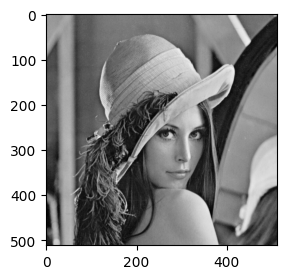

In [57]:
plt.figure(figsize=(3,3))
plt.imshow(image_gray, cmap='gray')
plt.show()

We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.


In [25]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)

True

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [26]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

We can plot the image:


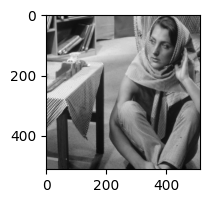

In [58]:
plt.figure(figsize=(2,2))
plt.imshow(im_gray,cmap='gray')
plt.show()

### Color Channels  


We can also work with the different color channels. Consider the following image:


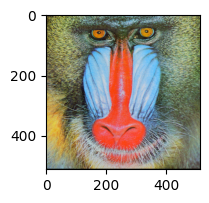

In [59]:
baboon=cv2.imread('baboon.png')
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

In [60]:
baboon.shape

(512, 512, 3)

We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [61]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [62]:
im_bgr = cv2.vconcat([blue, green, red])

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


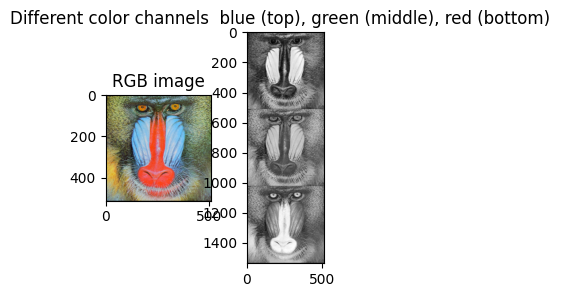

In [63]:
plt.figure(figsize=(3,3))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

### Indexing  


We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [68]:
rows = 256

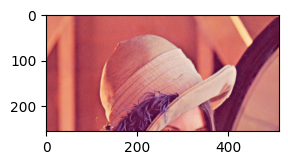

In [69]:
plt.figure(figsize=(3,3))
plt.imshow(new_image[0:rows,:,:])
plt.show()

We can also return the first 256 columns corresponding to the first half of the image:


In [35]:
columns = 256

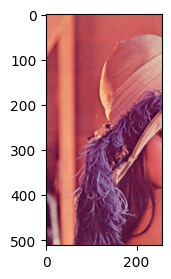

In [70]:
plt.figure(figsize=(3,3))
plt.imshow(new_image[:,0:columns,:])
plt.show()

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


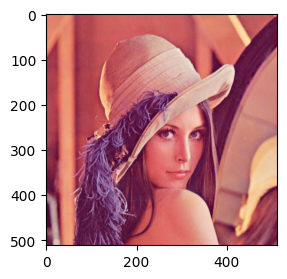

In [71]:
A = new_image.copy()
plt.figure(figsize=(3,3))
plt.imshow(A)
plt.show()

If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


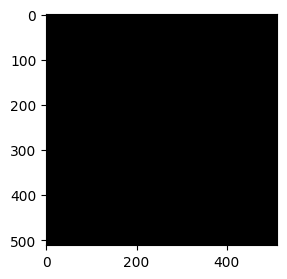

In [74]:
B = A
A[:,:,:] = 0
plt.figure(figsize=(3,3))
plt.imshow(B)
plt.show()

We can also manipulate elements using indexing. In the following piece of code, we create a new array `baboon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


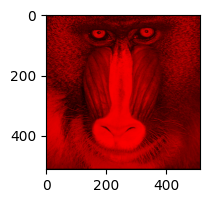

In [75]:
baboon_red = baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for blue:  


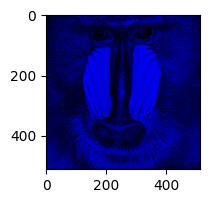

In [76]:
baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for green:


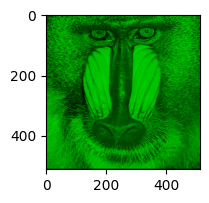

In [77]:
baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()

In [78]:
image=cv2.imread('baboon.png')

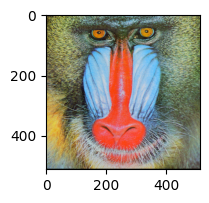

In [79]:
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

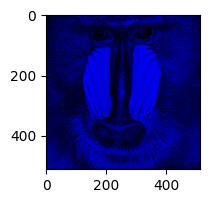

In [80]:
image=cv2.imread('baboon.png') # replace and add you image here name
baboon_blue=image.copy()
baboon_blue[:,:,1] = 0
baboon_blue[:,:,2] = 0
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()